In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [100]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
df.shape

(10000, 14)

In [102]:
# Unwanted columns are dropped ['RowNumber','CustomerId','Surname']
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [103]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [105]:
# Converting object datatype to int by labelencider
df.Gender.unique(),df.Geography.unique()

(array(['Female', 'Male'], dtype=object),
 array(['France', 'Spain', 'Germany'], dtype=object))

In [106]:
label_en=LabelEncoder()

In [107]:

def encoding(df,features):
  df[features]=label_en.fit_transform(df[features])

In [108]:
encoding(df,'Gender')
encoding(df,'Geography')
df.Gender.unique(),df.Geography.unique()

(array([0, 1]), array([0, 2, 1]))

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [110]:
X=df.iloc[:,:10]
y=df.Exited       

In [111]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [112]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [114]:
X_train.shape, X_test.shape

((7000, 10), (3000, 10))

In [115]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [116]:
model=Sequential()
model.add(Dense(64,input_dim=10))
model.add(Dense(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 645.4017 - accuracy: 0.6446 - val_loss: 566.4658 - val_accuracy: 0.7933
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 384.1405 - accuracy: 0.6710 - val_loss: 283.3317 - val_accuracy: 0.7933
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 421.8916 - accuracy: 0.6800 - val_loss: 244.0111 - val_accuracy: 0.7933
Epoch 4/20
219/219 [==============================] - 1s 2ms/step - loss: 371.4586 - accuracy: 0.6650 - val_loss: 144.6946 - val_accuracy: 0.7893
Epoch 5/20
219/219 [==============================] - 1s 2ms/step - loss: 443.6365 - accuracy: 0.6717 - val_loss: 631.1684 - val_accuracy: 0.3993
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 386.2114 - accuracy: 0.6720 - val_loss: 576.7521 - val_accuracy: 0.7437
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 321.9673 - accuracy: 0.6727 - val_loss: 536.3004 -

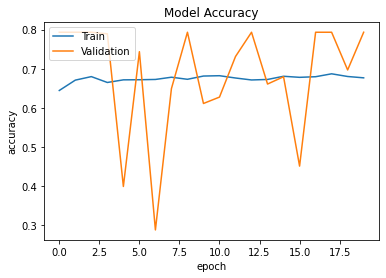

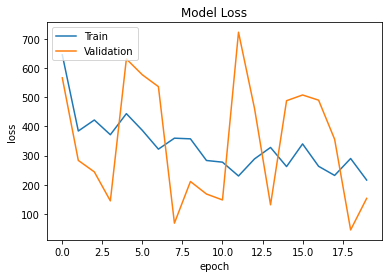

In [119]:
# Accuracy Plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

# Loss Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [120]:
prediction=np.round(model.predict(X_test))

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [122]:
accuracy_score(y_test,prediction)

0.7933333333333333

In [123]:
confusion_matrix(y_test,prediction)

array([[2380,    0],
       [ 620,    0]])

In [124]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2380
           1       0.00      0.00      0.00       620

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Improvements
1. Add in class weight to handle imbalance
2. Increase units in dense layers and also increase number of layers
3. Add BatchNormalization to layers.
4. Add Dropout to layers

In [126]:
from sklearn.utils.class_weight import compute_class_weight

In [127]:
class_weights=compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)
class_weights

array([0.6269031 , 2.47000706])

In [128]:
class_weights={i:k for i,k in enumerate(class_weights)}
class_weights

{0: 0.6269030986924593, 1: 2.4700070571630204}

In [129]:
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization
model2=Sequential()
model2.add(tensorflow.keras.layers.InputLayer(input_shape=(10,)))
model2.add(BatchNormalization())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.3))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.3))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 10)                40        
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)               

In [130]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [131]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,class_weight=class_weights)

Epoch 1/20
219/219 [==============================] - 2s 4ms/step - loss: 0.6684 - accuracy: 0.6999 - val_loss: 0.7386 - val_accuracy: 0.4867
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5777 - accuracy: 0.7004 - val_loss: 0.6367 - val_accuracy: 0.6483
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5576 - accuracy: 0.7127 - val_loss: 0.5785 - val_accuracy: 0.6867
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5413 - accuracy: 0.7206 - val_loss: 0.5707 - val_accuracy: 0.6780
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5199 - accuracy: 0.7304 - val_loss: 0.5264 - val_accuracy: 0.7250
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5061 - accuracy: 0.7446 - val_loss: 0.5095 - val_accuracy: 0.7253
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5104 - accuracy: 0.7406 - val_loss: 0.5339 - val_accuracy: 0.7120
Epoch 

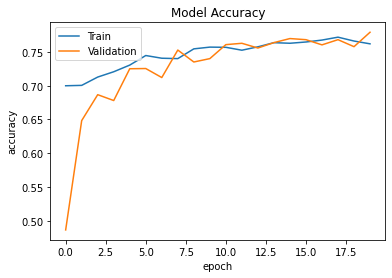

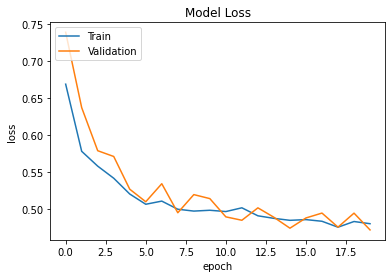

In [132]:
# Accuracy Plot

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

# Loss Plot

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [133]:
prediction2=np.round(model2.predict(X_test))

In [134]:
accuracy_score(y_test,prediction2)

0.779

In [135]:
confusion_matrix(y_test,prediction2)

array([[1856,  524],
       [ 139,  481]])

In [136]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2380
           1       0.48      0.78      0.59       620

    accuracy                           0.78      3000
   macro avg       0.70      0.78      0.72      3000
weighted avg       0.84      0.78      0.80      3000



In [137]:
y_test, prediction2

(937     0
 9355    0
 2293    1
 192     0
 8675    0
        ..
 4964    1
 8978    0
 7540    0
 5275    0
 9654    0
 Name: Exited, Length: 3000, dtype: int64, array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]], dtype=float32))

In [138]:
y_test, prediction

(937     0
 9355    0
 2293    1
 192     0
 8675    0
        ..
 4964    1
 8978    0
 7540    0
 5275    0
 9654    0
 Name: Exited, Length: 3000, dtype: int64, array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32))